# Introduction to RKColocal

### Shulei Wang<sup>1</sup> and Ming Yuan<sup>1</sup>

<sup>1</sup>Department of Statistics, University of Wisconsin-Madison; Morgridge Institute for Research

## Abstract

RKColocal provides baisc functions for dual-channel image input/output and colocalization analysis. RKColocal includes tools to display joint distribution of pixel intensities for colocalization analysis, evaluate the average degree of colocalization in a given region.

## Getting Started

The R package RKColocal can be downloaded from Github, installed and loaded by entering:

In [19]:
##install.packages("https://github.com/lakerwsl/RKColocal/blob/master/RKColocal_0.0.1.0000.tar.gz?", repo=NULL, type="source")
##.libPaths('C:/Program Files/R/R-3.4.3/library')
##suppressWarnings(library("RKColocal"))

Then, the library can be loaded by (very much PLATFORM-DEPENDENT at the moment):

In [20]:
##library(EBImage)
dyn.load(paste(system2("/usr/libexec/java_home", stdout=TRUE), "/jre/lib/server/libjvm.dylib", sep=""))
library(RKColocal)

There are three main functional modules in RKColocal:

1. **Dual-Channel Images I/O** provides basic functions to read, display and write dual channel images;

2. there are functions to plot different types of the joint distribution of pixel intensities in **Colocalization Analysis Plot**;

3. the functions in **Region based Colocalization Analysis** assess the average degree of colocalization in a given region of interest via evaluating some statistical quantity.

## Dual-Channel Images I/O

RKColocal supports the basic functions to read, display and write images via adopting the same input/ouput system in [EBImage](http://bioconductor.org/packages/release/bioc/html/EBImage.html). The dual channel images can be read by function readImage in [EBImage](http://bioconductor.org/packages/release/bioc/html/EBImage.html) and the two corresponding channels can be extracted from it. One typical example of reading dual-channel images is to load two channels as X and Y from sample images distributed with the package.

In [21]:
##f = system.file("images", "Colocalize_sample.tif", package = "RKColocal")
sample = "sample.jpeg"
img = readImage(sample)
X = imageData(img)[,,1]
Y = imageData(img)[,,2]

```readImage``` currently supports three forms of images: jpeg, png and tiff and see the details in [EBImage](http://bioconductor.org/packages/release/bioc/html/EBImage.html). The two channels ```X``` and ```Y``` can also be seen as two matrices, and their dimensions can be accessed using the ```dim``` just like for a regular matrix.

In [22]:
dim(X)

[1] 1024 1024

For convenience of visualization, the two channels are usually represented by 'green' and 'red' color. These two channels colored by 'green' and 'red' can be visualized by the function ```DualImageVisual```.

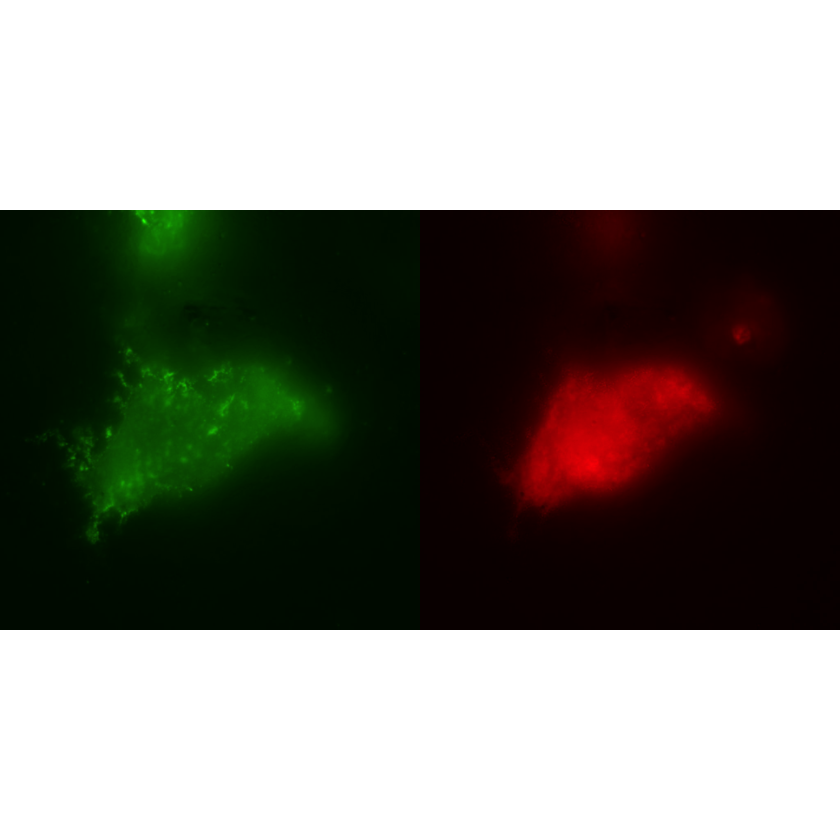

In [23]:
DualImageVisual(X, Y, isSplit = TRUE)

The most straight-forward way to assess the colocalization is to overlay two channels into one image. If we see the yellow color in the composite image, then the colocalization occurs between two channels. The composite image can also be visualized by the function ```DualImageVisual``` with the argument ```isSplit=FALSE```.

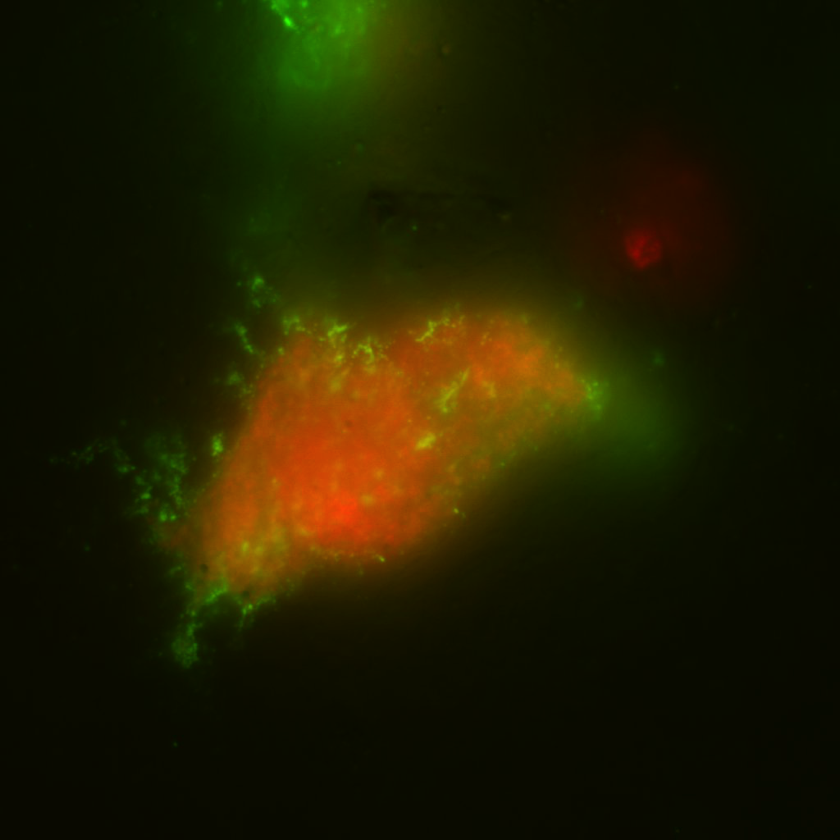

In [24]:
DualImageVisual(X, Y, isSplit = FALSE)

The colocalization analysis is sometimes restricted into some region of interest (ROI). In RKColocal, the region of interest is represented by a boolean matrix with the same dimensions of two channels, where ```TRUE``` means pixel is included in ROI. We load a ROI for the image above from a sample ROI distributed with the package and visualize it via function ```display``` in [EBImage](http://bioconductor.org/packages/release/bioc/html/EBImage.html).

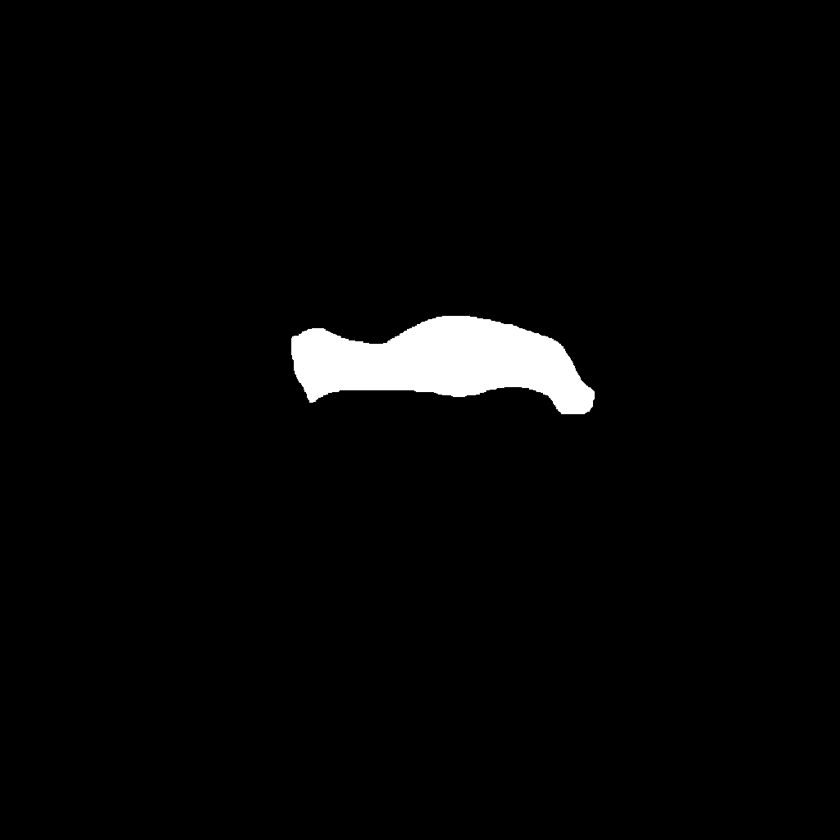

In [25]:
data(ROI)
display(ROI)

Function ```DualImageVisual``` supports the dual-channel image is displayed only in ROI with argument ```mask=ROI```.

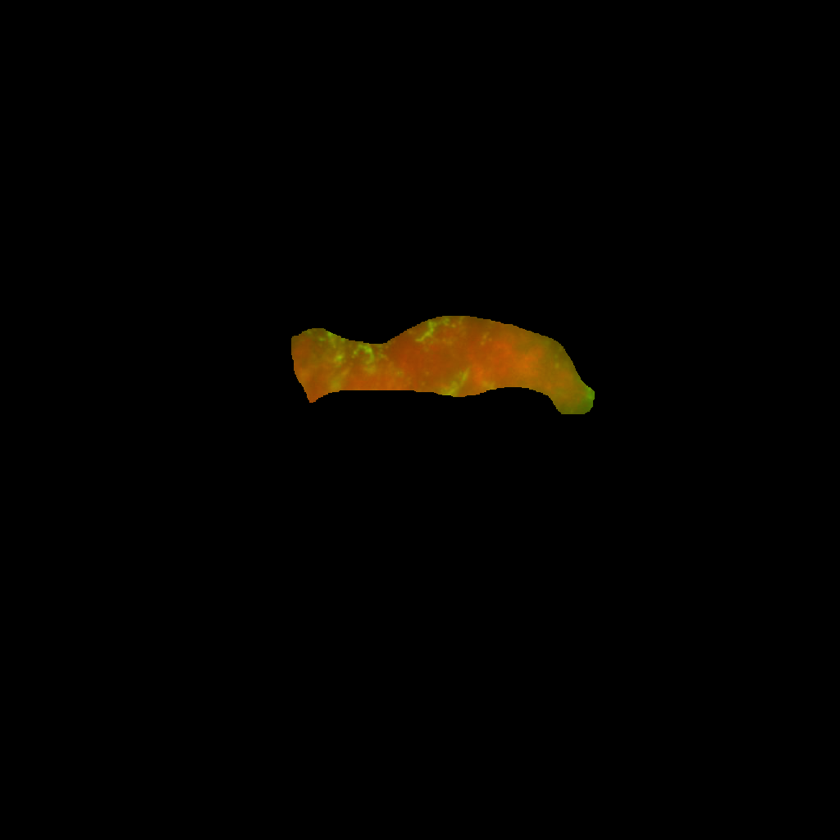

In [26]:
DualImageVisual(X, Y, isSplit = FALSE, mask = ROI)

Images can be saved to files using the ```DualImageSave``` function. The same with ```DualImageVisual```, two channels are saved in two seperate images with ```isSplit=TRUE``` and only pixels within ROI are saved when ```mask=ROI```.

In [27]:
DualImageSave(X, Y, name = "sample.png", isSplit = TRUE, mask = ROI)

The dual-channel images can be saved as jpeg, png or tiff and see more details in introduction of function writeImage in [EBImage](http://bioconductor.org/packages/release/bioc/html/EBImage.html).

## Colocalization Analysis Plot

Besides overlaying two channels, joint distribution of pixel intensitiy between two channels is another way to inspect colocalization visually. In RKColocal, function ```colocalplot``` supports two types of colocalization analysis plot: scatter plot (see, e.g. Bolte and Cordeliéres 2006; Comeau, Costantino, and Wiseman 2006; Dunn, Kamocka, and McDonald 2011) and Li’s plot (see, e.g. Li et al. 2004).

* **Scatter Plot**: Scatter plot is a useful graphical tool to display joint distribution of pixel intensities in dual-channel images, where the pixel intensity of green channel ```X``` is plotted against the intensity of red channel ```Y```. The scatter plot for dual-channel images can be displayed via ```colocalplot``` with argument ```method = 'scatter'```.

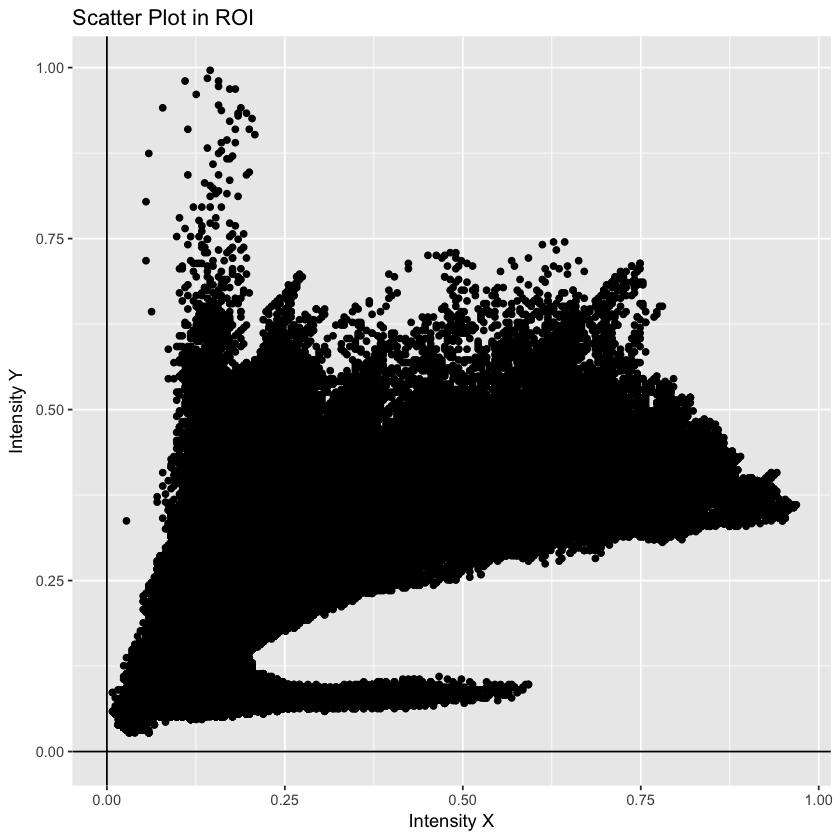

In [28]:
colocalplot(X, Y, method = 'scatter')

The scatter plot can be restricted into pre-defined ROI with argument mask = ROI.

* **Li’s Plot**: Different from scatter plot, Li’s plot provides two seperate plots instead of one. The common $x$ axis is $(X_i−\bar{X})(Y_i−\bar{Y})$ in both plots and the $y$ axes in two plots are $X_i$ and $Y_i$, respectively. The Li’s plot in the region of interest can be shown via ```colocalplot``` with arguments ```method = 'li'``` and ```mask = ROI```.

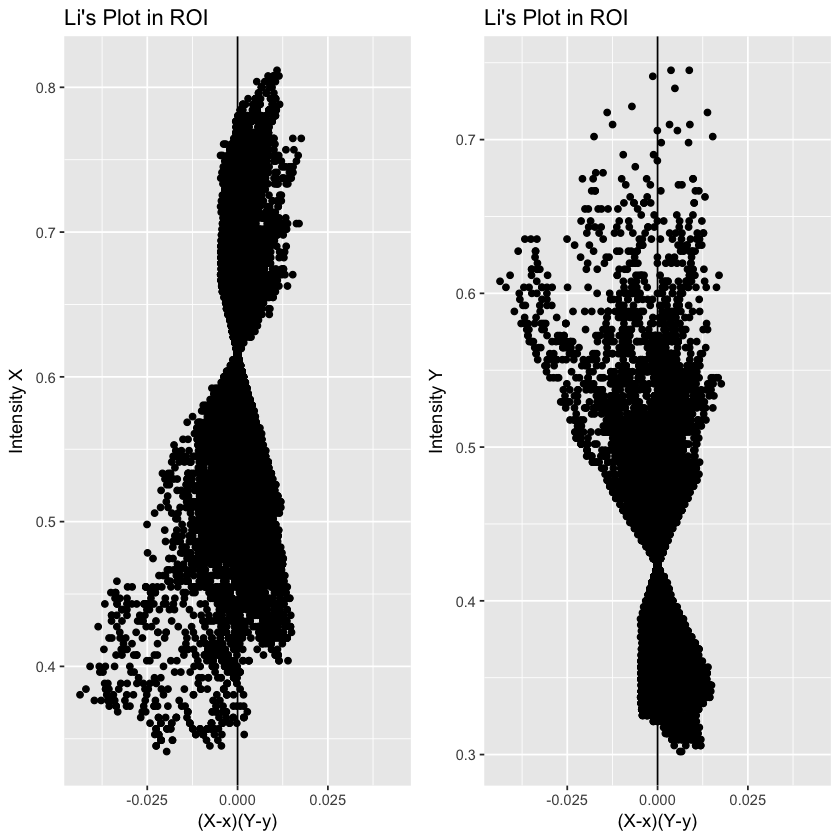

In [29]:
colocalplot(X, Y, mask = ROI, method = 'li')

## Region based Colocalization Analysis

The most common used colocalization analysis method is to evaluate a statistical quantity for colocalization/correlation in a given region (region of interest or the whole image). In RKColocal, this process is implemented by function ```colocalroi```. In ```colocalroi```, six different colocalization measures are implemented: *Pearson correlation coefficient, Manders’ colocalization coefficients, Kendall tau correlation coefficient, Spearman’s rank correlation coefficient, intensity correlation quotient and maximum truncated Kendall tau correlation coefficient*. These methods can be chosen via argument ```method```.

### Classical Colocalization Measure

We introduce the first five classical colocalization measures in this section.

* **Pearson correlation coefficient**
Pearson correlation coefficient is a very popular statistics for correlation, measuring the degree of linear relationship between two variables. It is first introduced to colocalization analysis by Manders (see Manders et al. 1992). Mathematically, it can be expressed as

$$
\begin{equation*}
r = \frac{\sum_{i=1}^n (X_i−\bar{X})(Y_i−\bar{Y})}{\sqrt{\sum_{i=1}^n (X_i−\bar{X})^2 \sum_{i=1}^n (Y_i−\bar{Y})^2}}
\end{equation*}
$$

where $X_i$ and $Y_i$ are the pixel intensity of green and red channels at pixel $i$. Here, $\bar{X}$ and $\bar{Y}$ are the mean of pixel intensities. $r$ can be calculated via function ```colocalroi``` with argument  ```method = 'pearson'```.

In [30]:
colocalroi(X, Y, method = 'pearson')

[1] 0.8443913

The colocalization analysis can also restrict into the region of interest by setting argument ```mask = ROI```.

In [31]:
colocalroi(X, Y, mask = ROI, method = 'pearson')

[1] -0.006204956

* **Manders colocalization coefficients**
Another popular colocalization measure is Manders colocalization coefficients, introduced by Manders, Verbeek, and Aten (1993). Instead of one single measure, there are two components in Manders colocalization coefficients, i.e. $M_1$ and $M_2$. They can be written as


<center>$\begin{equation*}M_1 = \frac{\sum_{i=1}^n X_i I (Y_i > \alpha_Y)}{\sum_{i=1}^n X_i}\end{equation*}$ and $\begin{equation*}M_2 = \frac{\sum_{i=1}^n Y_i I (X_i > \alpha_X)}{\sum_{i=1}^n Y_i} \end{equation*}$</center>

where $\alpha_X$ and $\alpha_Y$ are the thresholds for two channels and $I(⋅)$ is an indicator function. These coefficients $M_1$ and $M_2$ measure fractions of signal in one channel that overlap with the other. Different from Pearson’s correlation coefficient, Manders’ colocalization coefficients measure the degree of colocalization manifested in a distinct way. It measures co-occurence and is most useful if simple spatial overlap between the two probes is expected. $M_1$ and $M_2$ can be calculated by setting ```method = 'mandersM1'``` or ```method = 'mandersM2'```.

In [32]:
colocalroi(X, Y, method = 'mandersM1')

[1] 0.9888702

In [33]:
colocalroi(X, Y, method = 'mandersM2')

[1] 0.5149765

Thresholds $\alpha_X$ and $\alpha_Y$ can be input mannually via arguments ```Thresholds``` or can be set as Otsu’s thresholds when ```Thresholds=NULL```.

* **Spearman’s rank correlation coefficient**
Spearman’s rank correlation coefficient can be seen as a robust version of Pearson correlation coefficient, introduced into colocalization analysis by French et al. (2008) and Adler, Pagakis, and Parmryd (2008). Compared with Pearson correlation coefficient, Spearman’s rank correlation coefficient is able to capture a wider range of assoiations. It is Pearson correlation coefficient between rank $R_i$ and $T_i$ after transforming raw data $X_i$ and $Y_i$ to corresponding rank $R_i$ and $T_i$, i.e.

$$
\begin{equation*}
S = \frac{\sum_{i=1}^n (R_i−\bar{R})(T_i−\bar{T})}{\sqrt{\sum_{i=1}^n (R_i−\bar{R})^2 \sum_{i=1}^n (T_i−\bar{T})^2}}
\end{equation*}
$$

$S$ can be calculated by function ```colocalroi``` with argument ```method = 'spearman'```.

In [34]:
colocalroi(X, Y, method = 'spearman')

[1] 0.9288932

* **Kendall tau correlation coefficient**
Similar with Spearman’s rank correlation coefficient, Kendall tau correlation coefficient is another popular rank correlation coefficient and is able to capture a wider range of associations beyond linear relationship. It is expressed as

$$
\begin{equation*}
\tau = \frac{2}{n(n−1)} \sum_{1\leq i < j\leq n} sign(X_i-X_j)sign(Y_i-Y_j),
\end{equation*}
$$

where $sign(⋅)$ is a function returning sign of input. $\tau$ can be calculated via function ```colocalroi``` with argument ```method = 'kendall'```.

In [35]:
colocalroi(X, Y, mask = ROI, method = 'kendall')

[1] 0.02708241

* **Intensity correlation quotient**
With the same idea in Li’s plot, Li et al. (2004) proposes a new statistics called intensity correlation quotient. It is basically ratio of pixels where $(X_i−\bar{X})(Y_i−\bar{Y})>0$. The idea is similar with rank correlation coefficient, since only sign information is extracted. It can be expressed as

$$
\begin{equation*}
Q = \frac{\sum_{i=1}^n I((X_i−\bar{X})(Y_i−\bar{Y}) > 0)}{n} - \frac{1}{2},
\end{equation*}
$$

$Q$ can be calculated via function ```colocalroi``` with argument ```method = 'icq'```.

### Robust Colocalization Measure

In [36]:
colocalroi(X, Y, method = 'trunkendall')

[1] 42.14408

All colocalization measures above overlook an important fact that a dark background with positive offset may occupy a substantial area of the image. To overcome this, Wang et al. (2017) proposes to evaluate Kendall tau only on the subset of pixels where both channels are sufficiently bright, leading to truncated Kendall tau correlation coefficient

$$
\tau(t_X,t_Y) = \frac{1}{n_{t_X,t_Y} (n_{t_X,t_Y} - 1)} \sum_{ij \in \kappa (t_X,t_Y):i \neq j} sign(X_i-X_j)sign(Y_i-Y_j),
$$

where


<center>$\kappa(tX,tY) = \{i:X_i > t_X,Y_i > t_Y\}$  and $n_{t_X,t_Y}=|{\kappa(tX,tY)}|$,</center>


for two pre-specified thresholds $t_X$ and $t_Y$.

In practice, we do not know at which level $t_X$ and $t_Y$ colocalization may occur and determining the background is a complex process and very susceptible to misspecification. To over come this problem, Wang et al. (2017) proposes to instead the maximum of normalized $\tau(t_X,t_Y)$ for all possible $t_X$s and $t_Y$s. Therefore, maximum truncated Kendall tau correlation coefficient (MTKT) can be expressed as

$$
\tau^∗=\max_{t_X≥\beta_X,t_Y≥\beta_Y}\left\{\tau(t_X,t_Y) \cdot \sqrt{\frac{9n_{t_X,t_Y}(n_{t_X,t_Y} - 1)}{2(2n_{t_X,t_Y} + 5)}}\right\},
$$

where $\beta_X$ and $\beta_Y$ are two lower bounds for possible thresholds.

Obviously, it is time consuming to evaluate $\tau(t_X,t_Y)$ for all poosible thresholds $t_X$ and $t_Y$ in practice. Wang et al. (2017) proposes an approximationed version for $\tau^*$

$$
\tau_{app}^∗=\max_{t_X=X_{(j)},t_Y=Y_{(k)}:j,k \in R_n}\left\{\tau(t_X,t_Y) \cdot \sqrt{\frac{9n_{t_X,t_Y}(n_{t_X,t_Y} - 1)}{2(2n_{t_X,t_Y} + 5)}}\right\},
$$

where $R_n$ is

$$
R_n=\left\{ s : s = \lfloor n - ( 1 + \frac{1}{log log n})^j \rfloor,j = 1, ..., X_{(s)} \geq \beta_X \text{ or } Y_{(s)} \geq \beta_Y \right\}
$$


$\tau^*_{app}$ can be calculated via function ```colocalroi``` with argument ```method = 'trunkendall'```.

Lower bound of thresholds $B_X$ and $B_Y$ can be input mannually via arguments ```Thresholds``` or can be set as Otsu’s thresholds when ```Thresholds=NULL```.

In [37]:
colocalroi(X, Y, Thresholds=c(0.5,0.5), method = 'trunkendall')

[1] 8.650922

### Statistical Test on Colocalization

To interpret the values of different colocalization measures above, we formulate the region based colocalization analysis as a hypothesis testing problem

<center>$H_0$: no colocalization  v.s.  $H_1$: colocalization happens</center>

To assess statistical significance ($p$-value) under hypothesis above, RKColocal adopts permutation test to calculate $p$-value via function ```colocalroitest```. With the same arguments in  ```colocalroi```, ```method``` can be set as one of six colocalization measures above and ```mask``` is designed for region of interest. The ```Thresholds``` can be manually input when ```method``` is  ```mandersM1```, ```mandersM2``` or ```trunkendall```. A typical example is to apply permutation test on sample dual-channel images.

In [38]:
Testresult <- colocalroitest(X, Y, mask = ROI, method = 'pearson')
Testresult

$Index_Value
[1] -0.006204956

$P_value
[1] 0.8712871

$Null_Distribution
  [1] -1.262037e-02 -6.723016e-03 -2.871403e-03  6.255266e-03 -4.603073e-03
  [6] -1.424313e-03 -4.948673e-03  4.445181e-03  3.361682e-04 -4.302184e-03
 [11] -1.296972e-03  1.166940e-03 -2.726395e-03  4.020485e-03  1.390168e-02
 [16] -5.349857e-03 -6.522831e-03 -3.416916e-03 -2.387590e-03  1.139760e-03
 [21]  4.599022e-03  6.935322e-03 -7.706218e-04  2.102357e-03 -5.456133e-03
 [26]  8.984868e-03  7.831516e-04 -4.171039e-03 -4.350022e-03 -1.982465e-03
 [31] -8.197694e-03 -5.442083e-04  2.478807e-03  1.446899e-03 -6.158205e-03
 [36]  1.406450e-02 -5.518648e-03 -4.320395e-03 -3.440698e-03 -4.748488e-03
 [41] -1.041883e-03  3.348176e-03 -8.355832e-04  4.769444e-03 -1.281615e-03
 [46] -3.128123e-03  7.624944e-04 -4.185308e-03 -4.836961e-03 -2.420478e-03
 [51]  1.046240e-02  1.964008e-03  1.299902e-02  8.418290e-03  8.602167e-03
 [56]  3.912307e-03 -7.972639e-03  4.920975e-03  3.541021e-03  7.583985e-03
 [61]  4.14673

The output of ```colocalroitest``` is an object of class ```colocalroitest```. There are three parts in the class of ```colocalroitest```: **Index_Value** is the value of colocalization measure without permutation; **Null_Distribution** is the collection of values of colocalization measure in each permutation; **P_value** is the approximated $p$-value calculated from permutation test. The class ```colocalroitest``` can also be displayed as histogram via function ```plot```. The ```Testresult``` is plot via ```plot```.

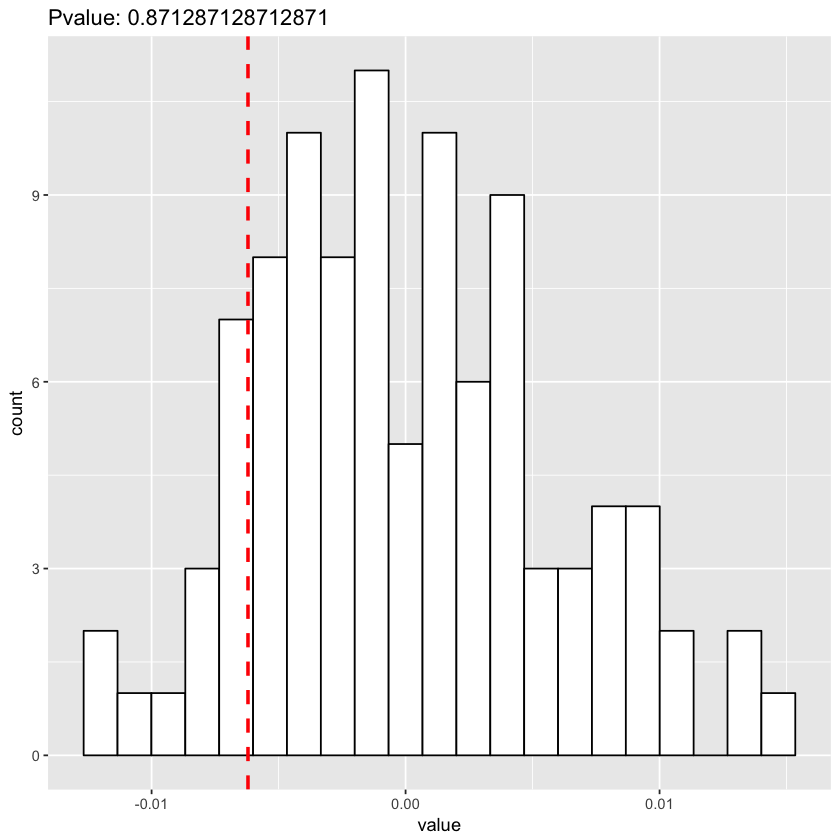

In [39]:
plot(Testresult)

The default times of permutation in ```colocalroitest``` is 100 and it can also be reset via arguments ```times```. For example, the permutation time can be set as 1000.

In [40]:
colocalroitest(X, Y, mask = ROI, times = 1000, method = 'pearson')

$Index_Value
[1] -0.006204956

$P_value
[1] 0.8321678

$Null_Distribution
   [1] -7.881721e-03 -5.085798e-03  8.136021e-03 -6.714454e-03 -4.111597e-04
   [6] -9.062306e-03  3.138750e-03  3.098930e-03  6.289785e-03  8.689060e-04
  [11] -5.077864e-04  3.303600e-03 -5.193025e-03 -9.080193e-04  5.876098e-03
  [16]  7.982367e-04  2.338148e-03  1.157427e-03  2.232332e-04  2.361795e-03
  [21] -1.807966e-03  7.445093e-03 -2.102738e-03  6.062149e-03  3.507589e-03
  [26] -4.934267e-03 -6.383887e-04 -1.157672e-03  2.747758e-03 -9.514453e-03
  [31] -1.786085e-03  1.307010e-02  2.629795e-03 -3.233039e-03  4.340400e-03
  [36]  5.724295e-03 -2.477286e-03 -5.183648e-03 -8.578629e-03  2.501503e-03
  [41]  7.219223e-03  6.975821e-03  1.122364e-03  3.900076e-03 -1.181895e-02
  [46] -4.515823e-03  4.864032e-03  8.086688e-03  4.095232e-03 -9.303533e-03
  [51] -5.694777e-03 -1.027877e-02  9.762502e-03 -1.384034e-04  2.342361e-03
  [56] -7.399079e-04 -1.481234e-02  4.175414e-03  4.655965e-03  6.333138e-03
  

The potential hurdle of permutation test is the computation cost. To overcome this, ```colocalroitest``` can conduct permutation test in a parallel computing fashion via R package [doParallel](https://cran.r-project.org/web/packages/doParallel/index.html). Parallel computing can be active with arguments ```is.parallel=TRUE``` and the number of core can be set via ```numcore```. In the following example, the number of core for parallel computing is 2.

In [41]:
colocalroitest(X, Y, mask = ROI, is.parallel = TRUE, numcore = 2, method = 'pearson')

$Index_Value
[1] -0.006204956

$P_value
[1] 0.8613861

$Null_Distribution
  [1]  2.288272e-03 -6.143935e-03 -7.296389e-03 -5.543110e-03  4.226022e-04
  [6]  6.212185e-03  1.011928e-04  5.794285e-03 -7.895175e-03  3.144865e-03
 [11] -6.092836e-03  7.660278e-04  1.014955e-02 -5.392802e-03  3.932473e-04
 [16]  2.281884e-03 -1.146764e-02 -4.957506e-03  8.821106e-03  4.146467e-03
 [21]  2.925111e-03 -1.077762e-03  7.853616e-03 -1.923755e-03  9.832001e-04
 [26]  1.235979e-03 -2.789182e-03  3.868682e-03 -4.892137e-03  7.375646e-03
 [31] -3.532840e-03  4.480160e-04  2.260548e-03  4.935789e-03  5.325473e-04
 [36]  9.482731e-04  3.337741e-05 -4.557681e-03 -4.366874e-03 -7.037358e-03
 [41]  3.383426e-04 -1.272542e-02 -7.055298e-03  5.830707e-03 -5.610246e-03
 [46] -5.946605e-03  1.096864e-02 -3.887002e-03  3.571192e-03 -1.057240e-03
 [51]  7.446180e-03 -2.276558e-03 -4.664772e-03 -6.587929e-03 -9.508474e-03
 [56]  2.507483e-03  1.316441e-02 -3.555264e-03 -3.289387e-04  9.603904e-03
 [61]  1.68029

Another practical challenge is the potential dependence among $X_i$s and $Y_i$s. To overcome this problem, ```colocalroitest``` has options to conduct block based permutation test, proposed by Costes et al. (2004). Block based permutation test permutes the block by blcok on pre-defined block instead of pixel by pixel. The block based permutation test is execute only when ```mask=NULL``` and block size ```bsize``` is set as some integer larger than 1. For instance, we can permute the colocalroitest(X, Y, bsize = 32, method = 'mandersM2')32×32 block in the sample dual-channel image.

In [ ]:
colocalroitest(X, Y, bsize = 32, method = 'mandersM2')

## Spatial Adaptive Colocalization Analysis (SACA)

Although the region based colocalization analysis above can tell the existence of colocalization in any given region, all of them overlook the spatial information of images and fail to identify the colocalized region. Recently, Wang, Arena, Becker, et al. (2017) proposes a new framework for spatial adaptive colocalization analysis. It is implenmented in the function ```colocalpixel```. We apply it on the sample images.

In [ ]:
saca <- colocalpixel(X, Y)
str(saca)

In [ ]:
List of 5
 $ Zvalue  : num [1:1024, 1:1024] 0 0 0 0 0 0 0 0 0 0 ...
 $ Pvalue  : num [1:1024, 1:1024] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ SigPixel: num [1:1024, 1:1024] 0 0 0 0 0 0 0 0 0 0 ...
 $ Red     : num [1:1024, 1:1024] 0.0353 0.0353 0.0353 0.0353 0.0353 ...
 $ Green   : num [1:1024, 1:1024] 0.051 0.051 0.051 0.051 0.051 ...
 - attr(*, "class")= chr "colocalpixel"

The output of function ```colocalpixel``` is an object of class ```colocalpixel```. There are five components in class ```colocalpixel```: **Zvalue** is a matrix with the same dimension of input image, each entry of which is pixelwised z-value; **Pvalue** is a matrix with the same dimension of input image, each entry of which is pixelwised p-value; **SigPixel** is a boolean matrix representing significant/colocalized pixel; **Red** and **Green** are the two channels of dual-channel image. We can also plot the colocalized region of the class ```colocalpixel``` via function ```plot```.

In [ ]:
plot(saca)

In the plot above, the colocalized region is labelled by blue color. Besides the colocalized regions, RKColocal can also display the heat map of z-values via function ```HeatMapZ```.

In [ ]:
HeatMapZ(saca)

Through this heatmap of z-value, the pixelwise colocalization level is dispalyed clearly and most high degree of colocalization concentrates on the edge of cell.

The significant region is selected via multiple comparison and the default mutiple comparison correction is through bonferroni method. Other mutiple comparison correction method can also be used and see the details in function ```p.adjust```.

In [ ]:
colocalpixel(X, Y, method = 'BH')

## References

Adler, J., S. N. Pagakis, and I. Parmryd. 2008. “Replicate-Based Noise Corrected Correlation for Accurate Measurements of Colocalization.” Journal of Microscopy 230: 121–33.

Bolte, S., and F. P. Cordeliéres. 2006. “A Guided Tour into Subcellular Colocalization Analysis in Light Microscopy.” Journal of Microscopy 224 (3): 213–32.

Comeau, J., S. Costantino, and P. Wiseman. 2006. “A Guide to Accurate Fluorescence Microscopy Colocalization Measurements.” Biophysical Journal 91 (12): 4611–22.

Costes, S., D. Daelemans, E. Cho, Z. Dobbin, G. Pavlakis, and S. Lockett. 2004. “Automatic and Quantitative Measurement of Protein-Protein Colocalization in Live Cells.” Biophysical Journal 86 (6): 3993–4003.

Dunn, K. W., M. M. Kamocka, and J. H. McDonald. 2011. “A Practical Guide to Evaluating Colocalization in Biological Microscopy.” American Journal of Physiology-Cell Physiology 300 (4): 723–42.

French, A. P., S. Mills, R. Swarup, M. J. Bennett, and T. P. Pridmore. 2008. “Colocalization of Fluorescent Markers in Confocal Microscope Images of Plant Cells.” Nature Protocols 3 (4): 619–28.

Li, Q., A. Lau, T.J. Morris, L. Guo, C.B. Fordyce, and E.F. Stanley. 2004. “A Syntaxin 1, Galpha(o), and N-Type Calcium Channel Complex at a Presynaptic Nerve Terminal: Analysis by Quantitative Immunocolocalization.” The Journal of Neuroscience 24: 4070–81.

Manders, E., J. Stap, G. Brakenhoff, R. Van Driel, and J. Aten. 1992. “Dynamics of Three-Dimensional Replication Patterns During the S-Phase, Analysed by Double Labelling of Dna and Confocal Microscopy.” Journal of Cell Science 103 (3): 857–62.

Manders, E., F. Verbeek, and J. Aten. 1993. “Measurement of Co-Localization of Objects in Dual-Colour Confocal Images.” Journal of Microscopy 169 (3): 375–82.

Wang, S., E. T. Arena, J. T. Becker, W. M. Bement, N. M. Sherer, K. W. Eliceiri, and M. Yuan. 2017. “Spatially Adaptive Colocalization Analysis in Dual-Color Fluorescence Microscopy.” ArXiv.

Wang, S., E. T. Arena, K. W. Eliceiri, and M. Yuan. 2017. “Automated and Robust Quantification of Colocalization in Dual-Color Fluorescence Microscopy: A Nonparametric Statistical Approach.” IEEE Transactions on Image Processing to appear.